In [24]:
import json
import numpy as np
from scipy import sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import glob

In [25]:
files = glob.glob("../1011/*")
files.sort()
files = files[1:]

In [26]:
files

['../1011/result_10_10_0_1_100000_0.000000.json',
 '../1011/result_10_10_0_1_100000_0.001000.json',
 '../1011/result_10_10_0_1_100000_0.002000.json',
 '../1011/result_10_10_0_1_100000_0.004000.json',
 '../1011/result_10_10_0_1_100000_0.008000.json',
 '../1011/result_10_10_0_1_100000_0.010000.json',
 '../1011/result_10_10_0_1_100000_0.020000.json',
 '../1011/result_10_10_0_1_100000_0.040000.json',
 '../1011/result_10_10_0_1_100000_0.050000.json',
 '../1011/result_10_10_2_2_100000_0.000000.json',
 '../1011/result_10_10_2_2_100000_0.001000.json',
 '../1011/result_10_10_2_2_100000_0.002000.json',
 '../1011/result_10_10_2_2_100000_0.004000.json',
 '../1011/result_10_10_2_2_100000_0.008000.json',
 '../1011/result_10_10_2_2_100000_0.010000.json',
 '../1011/result_10_10_2_2_100000_0.020000.json',
 '../1011/result_10_10_2_2_100000_0.040000.json',
 '../1011/result_10_10_2_2_100000_0.050000.json']

In [27]:
len(files)

18

In [28]:
file_0 = files[0:9]
file_0

['../1011/result_10_10_0_1_100000_0.000000.json',
 '../1011/result_10_10_0_1_100000_0.001000.json',
 '../1011/result_10_10_0_1_100000_0.002000.json',
 '../1011/result_10_10_0_1_100000_0.004000.json',
 '../1011/result_10_10_0_1_100000_0.008000.json',
 '../1011/result_10_10_0_1_100000_0.010000.json',
 '../1011/result_10_10_0_1_100000_0.020000.json',
 '../1011/result_10_10_0_1_100000_0.040000.json',
 '../1011/result_10_10_0_1_100000_0.050000.json']

In [29]:
def agresti_coull_intetrval(pair):
    # num trial n
    success = pair[0]
    fail = pair[1]
    rate = success / (success + fail)
    n = success + fail
    z = 2
    n_tilda = n  + z ** 2
    p_tilda = (1 / n_tilda) * (success + (z**2/2) )
    # conf_int_min = p_tilda + (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # conf_int_max = p_tilda - (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    dif = (z * (np.sqrt(  (p_tilda / n_tilda) * (1 - p_tilda) )))
    # return [conf_int_min, rate, conf_int_max]
    # dif = conf_int_max - conf_int_min 
    return dif

def read_multiple_jsons(json_file_names):
    list_of_res = []
    for i in json_file_names:
        curve = json_to_data(i)
        list_of_res.append(curve)
    return list_of_res

def json_to_data(json_file_name):
    data = open(json_file_name)
    data = json.load(data)
    res = data['success_rate']
    
    rates = []
    errors = []
    
    for i in range(len(res)):
        num_success = res[i][0]
        num_fail = res[i][1]
        rate = num_fail / (num_success + num_fail)
        rates.append(rate)
        error = agresti_coull_intetrval([num_success, num_fail])
        errors.append(error)
    label = 'm=' + str(data['multiplexing']) + ' , strategy=' + str(data['strategy']) + ' , Pz=' +  str(round(data['prob_z'], 3))
    return res,rates,errors,label

def plot_multiple_data(list_of_res, phys_err, save=False, x_lim = False, y_lim = False. colors = None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for i in list_of_res:
        # ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = i[3])
        if colors != None:
            color = colors[cindex]
            if st_name == '':
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name, color = color, marker = marker, markersize = 3, alpha = 0.7)
            else:
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name + st_name, color = color, marker = marker, markersize = 3, alpha = 0.7)
        else:
            ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name + st_name, marker = marker, markersize = 3, alpha = 0.5)


    ax.set_yscale('log')
    ax.grid(which="major", alpha=0.6)
    ax.grid(which="minor", alpha=0.3)
    if x_lim != False:
        ax.set_xlim(x_lim[0], x_lim[1])
    if y_lim != False:
        ax.set_ylim(y_lim[0], y_lim[1])
    ax.set_xlabel("photon loss probability", fontsize = 15)
    ax.set_ylabel(r"logical $Z$ error probability", fontsize = 15)
    plt.style.use('tableau-colorblind10')
    plt.legend(loc='lower right', fontsize = 13)
    if save == True:
        filename = "multiplexed_toric"
        plt.savefig(filename + ".pdf")
    plt.show()

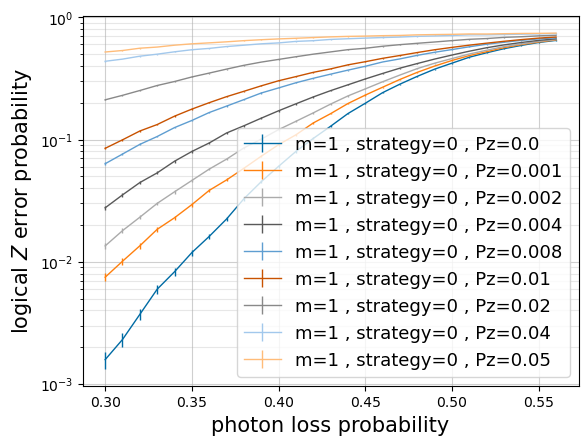

In [38]:
phys_err = [i*0.01+0.3 for i in range(27)]
list_of_res = read_multiple_jsons(file_0)
plot_multiple_data(list_of_res=list_of_res, phys_err=phys_err)

In [34]:
# // 0 without QM
# // 1 random
# // 2 random with threshold
# // 3 min distance
# // 4 max distance

In [35]:
file_2 = files[9:]
file_2

['../1011/result_10_10_2_2_100000_0.000000.json',
 '../1011/result_10_10_2_2_100000_0.001000.json',
 '../1011/result_10_10_2_2_100000_0.002000.json',
 '../1011/result_10_10_2_2_100000_0.004000.json',
 '../1011/result_10_10_2_2_100000_0.008000.json',
 '../1011/result_10_10_2_2_100000_0.010000.json',
 '../1011/result_10_10_2_2_100000_0.020000.json',
 '../1011/result_10_10_2_2_100000_0.040000.json',
 '../1011/result_10_10_2_2_100000_0.050000.json']

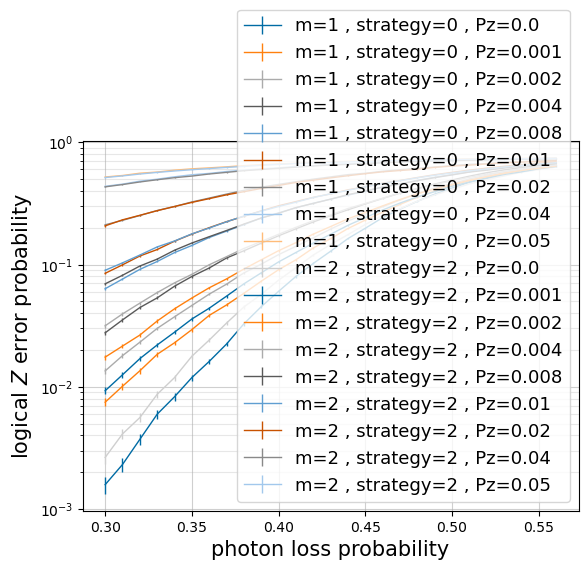

In [39]:
phys_err = [i*0.01+0.3 for i in range(27)]
list_of_res = read_multiple_jsons(file_0 + file_2)
plot_multiple_data(list_of_res=list_of_res, phys_err=phys_err)

In [45]:
def strategy_index_to_name(st_index):
    if st_index == 0:
        st_name = '' # without QM
    elif st_index == 1:
        st_name = '(iii) random'
    elif st_index == 2:
        st_name = '(iv) random + threshold'
    elif st_index == 3:
        st_name = '(i) Min distance'
    elif st_index == 4:
        st_name = '(ii) Max distance'
    elif st_index == 5:
        st_name = 'random_with_occupation_enhancement_for_each_photon'
    elif st_index == 6:
        st_name = 'random_with_occupation_enhancement'
    elif st_index == 7:
        st_name = r'(v) $X$ stabilizer' # 'star even'
    elif st_index == 8:
        st_name = r'(v) $X$ stabilizer' #'star odd'
    elif st_index == 9:
        st_name = r'(v) $Z$ stabilizer' # 'plaquette even'
    elif st_index == 10:
        st_name = r'(v) $Z$ stabilizer' #'plaquette odd'
    elif st_index == 11:
        st_name = '(v) Mixed stabilizer'
    else:
        st_name = 'unknown'
    return st_name

In [110]:
def read_multiple_jsons_st(json_file_names):
    list_of_res = []
    for i in json_file_names:
        curve = json_to_data_st(i)
        list_of_res.append(curve)
    return list_of_res

def json_to_data_st(json_file_name):
    data = open(json_file_name)
    data = json.load(data)
    res = data['success_rate']
    
    rates = []
    errors = []
    
    for i in range(len(res)):
        num_success = res[i][0]
        num_fail = res[i][1]
        rate = num_fail / (num_success + num_fail)
        rates.append(rate)
        error = agresti_coull_intetrval([num_success, num_fail])
        errors.append(error)
    label = 'm=' + str(data['multiplexing']) + ' , strategy=' + str(data['strategy']) + str(data['multiplexing']) + ' , pz=' + str(round(data['prob_z'], 3))
    return res,rates,errors,label,data['strategy'], data['multiplexing'], data['prob_z']

def plot_multiple_data_strategies(list_of_res, phys_err, save = False, grid = True, log = False, strategy_name = True, colors = None, markers = None, xlim = None, ylim = None, filename = None, linestyle = None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    cindex = 0
    mindex = 0

    length = len(list_of_res)
    print(length)
    for i in list_of_res:
        cindex = cindex + 1
        mindex = mindex + 1
        if strategy_name == True:
            if i[5] == 1:
                m_name = r'Pz = ' + str(round(i[6],4))
            else:
                m_name = ""
            st_name = strategy_index_to_name(i[4]) 

            if markers == None:
                marker  = None
            else: 
                marker = markers[mindex]

            if linestyle == None:
                linestyle = ['solid' for i in range(len(list_of_res))]

            if colors != None:
                color = colors[cindex]
                if st_name == '':
                    ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name, color = color, marker = marker, markersize = 3, alpha = 0.7, linestyle = linestyle[cindex])
                else:
                    if m_name == '':
                        ax.errorbar(phys_err, i[1], i[2], linewidth= 1, color = color, marker = marker, markersize = 3, alpha = 0.7, linestyle = linestyle[cindex])
                    else:
                        ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name + st_name, color = color, marker = marker, markersize = 3, alpha = 0.7, linestyle = linestyle[cindex])
            else:
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = m_name + st_name, marker = marker, markersize = 3, alpha = 0.5, linestyle = linestyle[cindex])
        else:
            if markers == None:
                marker  = None
            else: 
                marker = markers[mindex]
            if colors != None:
                color = colors[cindex]
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = i[3], color = color, marker = marker, markersize = 4, alpha = 0.7)
            else:
                ax.errorbar(phys_err, i[1], i[2], linewidth= 1, label = i[3], marker = marker, markersize = 4, alpha = 0.7)
    ax.errorbar([],[], linewidth= 1, label = r'm=1', marker = 'None', markersize = 4, alpha = 0.7, color = 'black')
    ax.errorbar([],[], linewidth= 1, label = '(ii) Random + Threshold', marker = 's', markersize = 4, alpha = 0.7, color = 'black')
    if grid == True:
        ax.grid(which="major", alpha=0.6)
        ax.grid(which="minor", alpha=0.3)
    if log == True:
        ax.set_yscale('log')
    ax.set_xlabel("photon loss probability", fontsize = 15)
    ax.set_ylabel(r"logical $Z$ error probability", fontsize = 15)


    if xlim != None:
        ax.set_xlim(xlim[0],xlim[1])
    else:
        ax.set_xlim(0, 1)
    if ylim != None:
        ax.set_ylim(ylim[0],ylim[1])
    else:
        ax.set_ylim(0.001, 1)
    plt.style.use('tableau-colorblind10')
    plt.legend(loc='lower right', fontsize = 13, bbox_to_anchor=(1, 0))
    if save == True:
        if filename == None:
            filename = "multiplexed_toric"
        else:
            filename = filename
        plt.savefig(filename + ".pdf")
    plt.show()

19
19
18


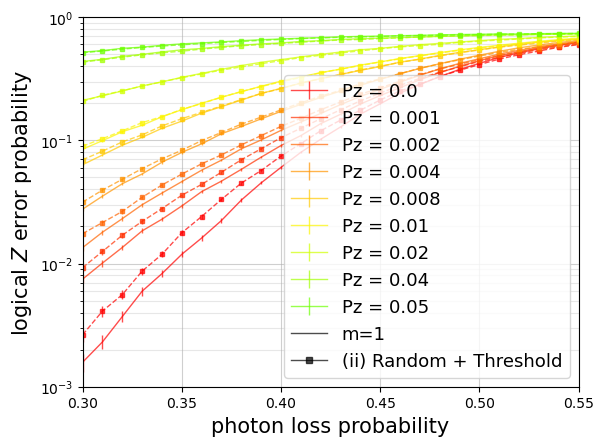

In [111]:
import matplotlib.cm as cm


phys_err = [i*0.01+0.3 for i in range(27)]
list_of_res = read_multiple_jsons_st(file_0 + file_2)

colors0 = [cm.hsv(i/30.0) for i in range(9)]
colors0 = [cm.hsv(0)] + colors0
colors2 = [cm.hsv(i/30.0) for i in range(9)]
colors = colors0 + colors2
# colors = ['C0','black','C5', 'C3', 'C1', 'C0','C5']
markers = ['None', 'None','None', 'None', 'None', 'None', 'None', 'None','None', 'None', 's','s','s','s','s','s','s','s','s',]
print(len(markers))
# , 'v', '^', 'o', 's',"$M$", 
line0 = ['solid' for i in range(10)]
line1 = ['dashed' for i in range(9)]
line = line0 + line1
print(len(line))
plot_multiple_data_strategies(list_of_res=list_of_res, phys_err=phys_err, save = True, log = True, grid = True, strategy_name = True, colors = colors, markers= markers, xlim=[0.3, 0.55], ylim = [0.001, 1], filename="10_10_multiplexed_toric_strategies_combined_0p01", linestyle = line)

In [112]:
len(list_of_res)

18

14
11
10


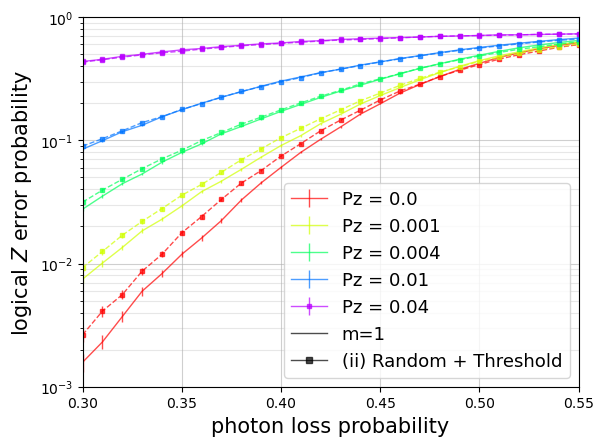

In [115]:
import matplotlib.cm as cm


files_plt = [file_0[0], file_0[1], file_0[3],file_0[5],file_0[7], file_2[0], file_2[1], file_2[3], file_2[5], file_2[7]]

phys_err = [i*0.01+0.3 for i in range(27)]
list_of_res = read_multiple_jsons_st(files_plt)
colors0 = [cm.hsv(i/5.0) for i in range(5)]
colors0 = [cm.hsv(0)] + colors0
colors2 = [cm.hsv(i/5.0) for i in range(5)]
colors = colors0 + colors2
# colors = ['C0','black','C5', 'C3', 'C1', 'C0','C5']
markers = ['None', 'None','None', 'None', 'None', 's','s','s','s','s','s','s','s','s',]
print(len(markers))
# , 'v', '^', 'o', 's',"$M$", 
line0 = ['solid' for i in range(6)]
line1 = ['dashed' for i in range(5)]
line = line0 + line1
print(len(line))
plot_multiple_data_strategies(list_of_res=list_of_res, phys_err=phys_err, save = True, log =True, grid = True, strategy_name = True, colors = colors, markers= markers, xlim=[0.3, 0.55], ylim = [0.001, 1], filename="10_10_multiplexed_toric_combined_gap", linestyle = line)